<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/medical-insurance-cost-prediction/blob/main/Mini_Project_DL_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mini Project: Medical Insurance Cost Prediction with ANN**

#**Problem Statement**

This mini project involves predicting the medical insurance charges of individuals based on their personal and health-related information.The dataset contains features such as age, BMI, smoking habits, region, and number of children


#**objective**

To perform EDA (Exploratory Data Analysis), data preprocessing, and build models ranging from a baseline ANN to an optimized ANN. The goal is to understand how deep learning can be applied to regression problems.


#**Data dictionary**

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance


#**Data link**

https://www.kaggle.com/datasets/mirichoi0218/insurance

#Importing Libraries

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

#Loading dataset

In [ ]:
# Importing the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Data Cleaning

In [ ]:
# Getting an idea about the duplicates in the data
df.duplicated().sum()

np.int64(1)

**Observations:**

*  np.int64(1) means that there is 1 dupicate rows in the dataset

In [ ]:
# Dropping the duplicate rows
df = df.drop_duplicates()

In [ ]:

# Getting an idea about the duplicates in the data
df.duplicated().sum()

np.int64(0)

**Observations:**

* np.int64(0) means that there are no dupicate rows in the dataset

In [ ]:
#Checking NULL values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


**Observations:**

* There are no NULL values in the dataset

#Exploratory Data Analysis

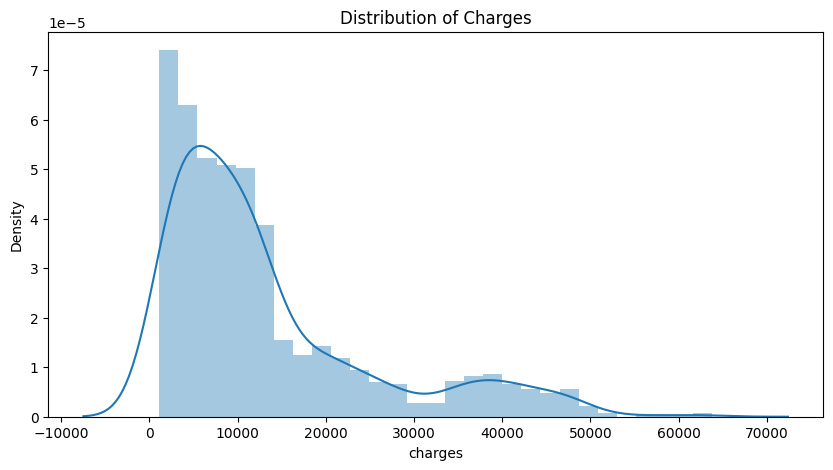

In [ ]:
#Ploting the distribution of charges.
plt.figure(figsize = (10, 5))
sns.distplot(df['charges'])
plt.title('Distribution of Charges')
plt.show()

**Observations:**

* The distribution of charges is right-skewed, indicating that most individuals have lower medical insurance charges, while a smaller number of individuals have significantly higher charges.

* There are peaks around certain charge values, which might suggest common medical procedures or conditions that result in similar costs.

* There is a long tail on the right side of the distribution, indicating the presence of outliers with very high medical costs.

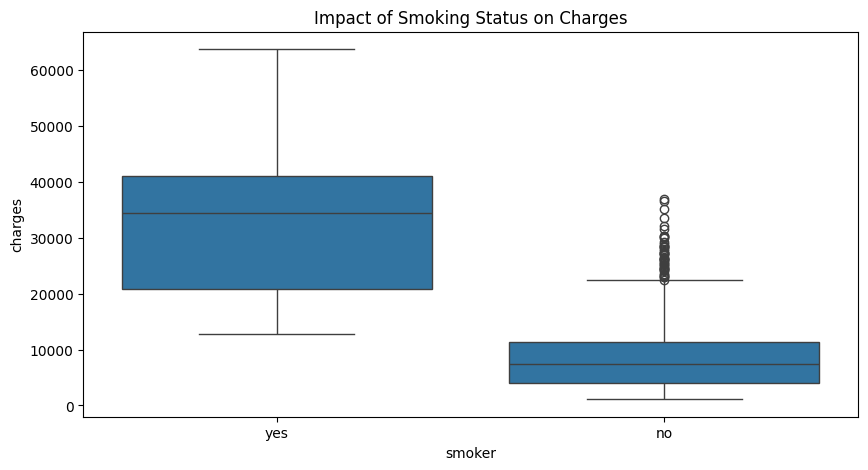

In [ ]:
#Analyzing the impact of smoking status on charges.
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.title('Impact of Smoking Status on Charges')
plt.show()

**Observations:**

* There is a significant difference in medical insurance charges between smokers and non-smokers.
* Smokers tend to have much higher medical insurance charges compared to non-smokers.
* The box plot for smokers shows a higher median charge and a wider interquartile range, indicating greater variability in charges among smokers.

* There are several outliers in the smoker group with extremely high charges.

* The box plot for non-smokers shows a lower median charge and a narrower interquartile range, suggesting lower and less variable charges.

Minimum BMI: 15.96
Maximum BMI: 53.13


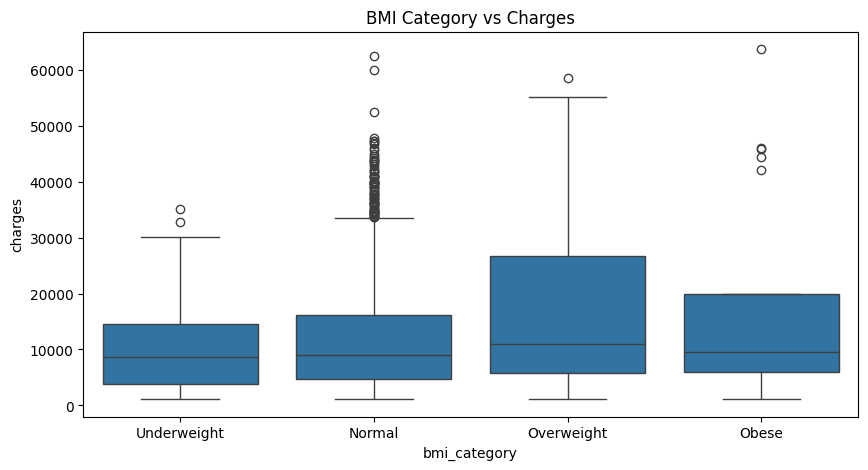

In [ ]:
# Create BMI categories
print("Minimum BMI:",df['bmi'].min())
print("Maximum BMI:",df['bmi'].max())

bmi_bins = [15,25,35,45,55] # Define BMI ranges
bmi_labels = ['Underweight','Normal', 'Overweight','Obese'] # Define labels for ranges
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Boxplots of BMI category vs charges
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'bmi_category', y = 'charges', data = df)
plt.title('BMI Category vs Charges')
plt.show()


**Observations:**

* People with higher BMI (Overweight and Obese) generally have higher medical insurance charges.
* The average charges increase as BMI increases.
* There's a wider range of charges for people with higher BMI.
* There are some individuals with very high charges regardless of their BMI category.

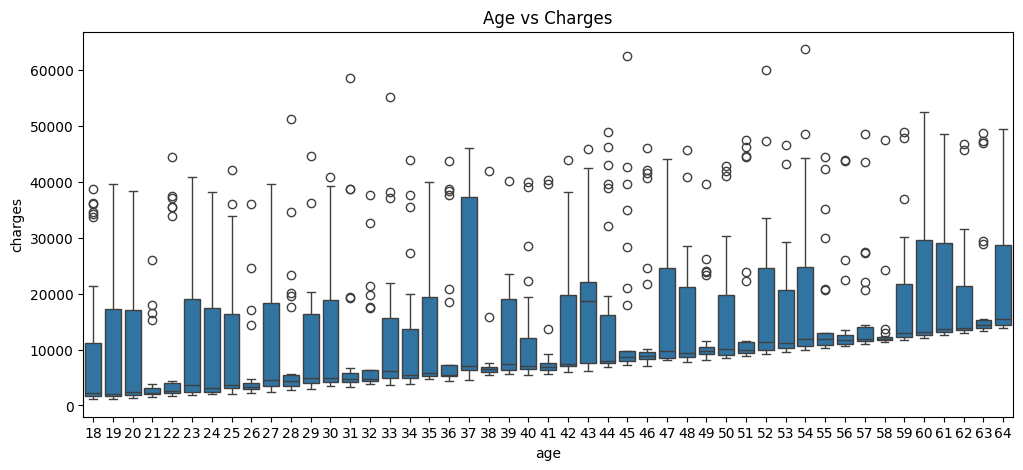

In [ ]:
#Age vs charges
plt.figure(figsize = (12, 5))
sns.boxplot(x = 'age', y = 'charges', data = df)
plt.title('Age vs Charges')
plt.show()

**Observations:**

* Older people generally have higher medical insurance costs.
* The range of costs is wider for older people.
* Some individuals have very high costs, especially in older age groups.
* Younger people tend to have lower and more consistent costs.

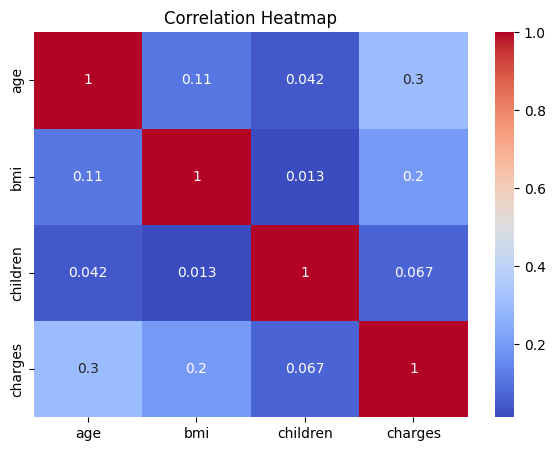

In [ ]:
# Correlation heatmap for numerical features.
plt.figure(figsize = (7,5))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Observations:**

* 'charges' has positive correlation with 'age' (0.30) and 'bmi' (0.20), suggesting that older individuals and those with higher BMI tend to have higher medical insurance charges.



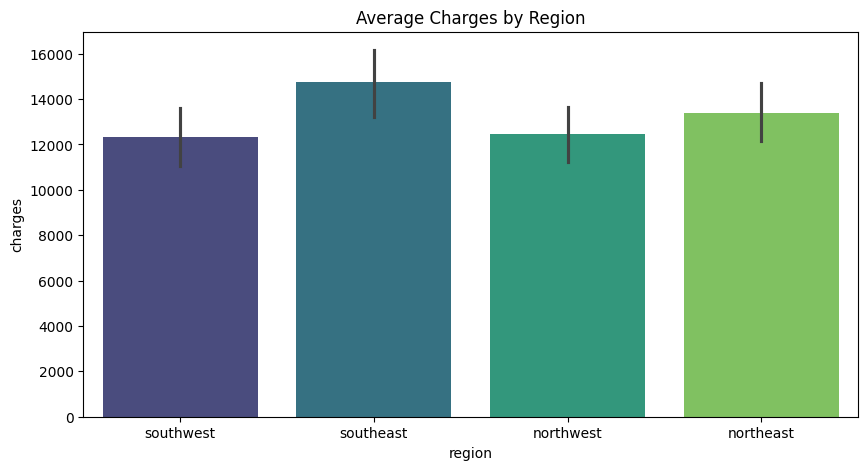

In [ ]:
#Compare average charges by region.
plt.figure(figsize = (10, 5))
sns.barplot(x = 'region', y = 'charges', data = df, palette = 'viridis')
plt.title('Average Charges by Region')
plt.show()

**Observations:**

* The Southeast region has the highest average medical insurance charges.
* The Southwest region has the lowest average medical insurance charges.
* The Northwest and Northeast regions have similar average charges.


# Data Preprocessing

In [ ]:
# Seperating the data into input features and target variabe
X = df.drop('charges', axis=1)
y = df['charges']

In [ ]:
# Getting the list of columns
print(X.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [ ]:
# Getting the list of categorical columns and numerical columns
categorical = ['sex', 'smoker', 'region']
numerical = ['age', 'bmi', 'children']

In [ ]:
# Preprocessing columns
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

# Splitting the data into train and test

In [ ]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# Preprocessing the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

#Model Building

In [ ]:
#Base line ANN model
model_base = Sequential([
    Dense(8, input_dim = X_train.shape[1], activation = 'relu'),
    Dense(1)
])

In [ ]:
#Compiling the model
model_base.compile(optimizer = 'adam', loss = 'mse', metrics = ['r2_score'])

In [ ]:
#Training the model
history_base = model_base.fit(X_train, y_train, validation_data = (X_test, y_test), epochs =100, verbose = 1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 320878464.0000 - r2_score: -1.2303 - val_loss: 315646304.0000 - val_r2_score: -1.1366
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 322830944.0000 - r2_score: -1.2406 - val_loss: 315565056.0000 - val_r2_score: -1.1361
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 322657664.0000 - r2_score: -1.1946 - val_loss: 315482464.0000 - val_r2_score: -1.1355
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 353131008.0000 - r2_score: -1.1836 - val_loss: 315398464.0000 - val_r2_score: -1.1349
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 305829568.0000 - r2_score: -1.1865 - val_loss: 315313376.0000 - val_r2_score: -1.1344
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 317894624.0000 - r2_score: -1.1625 - val_loss: 315224736.0000 - val_r2_score: -1.1338
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 342404704.0000 - r2_score: -1.1932 - val_loss: 315134272.0000 - val_r2_

In [ ]:
#Model Evaluation
loss_base, r2_base = model_base.evaluate(X_test, y_test)
print(f' Loss(MSE): {loss_base}')
print(f' R2 Score: {r2_base}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 301723616.0000 - r2_score: -1.0700 
 Loss(MSE): 299585344.0
 R2 Score: -1.0279064178466797


**Observations:**

* Negative value of R2 score means that if we would have given
average value as predicted value for every data point,
it would have been better than creating the model.

**Building an Optimal Model**

In [ ]:
#Optimized ANN model with Dropout

from tensorflow.keras.layers import Dropout

#Optimized model with Dropouts

model_opt = Sequential([
    Dense(128, input_dim = X_train.shape[1], activation = 'relu'),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.1),
    Dense(1)
])

In [ ]:
#Compiling the model
model_opt.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                                                       loss = 'mse', metrics = ['r2_score'])

In [ ]:
#Early stopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights =True)

In [ ]:
#Training the model
history_opt = model_opt.fit(X_train, y_train, validation_data = (X_test, y_test),
                             epochs = 100, batch_size = 32, callbacks = [early_stop], verbose = 1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 326239232.0000 - r2_score: -1.2987 - val_loss: 318341216.0000 - val_r2_score: -1.1549
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 325849440.0000 - r2_score: -1.2117 - val_loss: 317176096.0000 - val_r2_score: -1.1470
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 335684960.0000 - r2_score: -1.1980 - val_loss: 311252032.0000 - val_r2_score: -1.1069
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 311744192.0000 - r2_score: -1.1442 - val_loss: 291093536.0000 - val_r2_score: -0.9704
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 284512032.0000 - r2_score: -0.8927 - val_loss: 245194912.0000 - val_r2_score: -0.6597
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 238295904.0000 - r2_score: -0.5651 - val_loss: 178800256.0000 - val_r2_score: -0.2103
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 156641008.0000 - r2_score: -0.0385 - val_loss: 126836296.0000 - val_r2

In [ ]:
#Evaluating the model
train_loss_opt, train_r2_opt = model_opt.evaluate(X_train, y_train)
print(f'Train Loss(MSE): {train_loss_opt}')
print(f'Train R2 Score: {train_r2_opt}')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23434726.0000 - r2_score: 0.8246
Train Loss(MSE): 24818058.0
Train R2 Score: 0.8302937746047974


In [ ]:
#Evaluating the model
test_loss_opt, test_r2_opt = model_opt.evaluate(X_test, y_test)
print(f'Test Loss(MSE): {test_loss_opt}')
print(f'Test R2 Score: {test_r2_opt}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30160154.0000 - r2_score: 0.7926 
Test Loss(MSE): 32107520.0
Test R2 Score: 0.7826627492904663


**Observations:**

* Both training and testing R2 Score is within 5% of each other
* Both training and testing loss are above 0.78

Hence, we can say that the model looks optimal.

#Comparing Baseline and optimal model learning curves

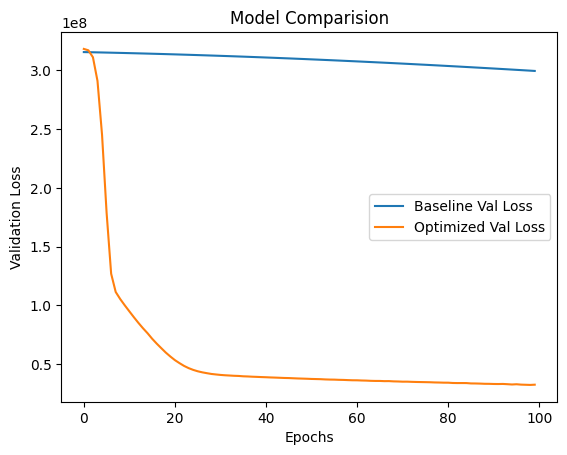

In [ ]:
#Compare Learning curves
plt.plot(history_base.history['val_loss'], label ='Baseline Val Loss')
plt.plot(history_opt.history['val_loss'], label ='Optimized Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Model Comparision')
plt.legend()
plt.show()

#Predictions on test data

In [ ]:
#Predictions
#Example from test set
sample = X_test[0].reshape(1, -1)
predicted_charge = model_opt.predict(sample)
print(f'Predicted Charge: {predicted_charge}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Charge: [[9349.831]]


In [ ]:
#Custom Input Example
custom_data = pd.DataFrame({
    'age': [35],
    'sex': ['male'],
    'bmi': [20],
    'children': [2],
    'smoker': ['no'],
    'region': ['southeast']
})
custom_processed = preprocessor.transform(custom_data)
predicted_charge = model_opt.predict(custom_processed)
print(f'Predicted Charge: {predicted_charge}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Predicted Charge: [[7459.662]]


In [ ]:
#Custom Input Example:2
custom_data = pd.DataFrame({
    'age': [39],
    'sex': ['male'],
    'bmi': [24.5],
    'children': [2],
    'smoker': ['yes'],
    'region': ['northwest']
})
custom_processed = preprocessor.transform(custom_data)
predicted_charge = model_opt.predict(custom_processed)
print(f'Predicted Charge: {predicted_charge}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Charge: [[25135.969]]


#Actual vs Predicted plot

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


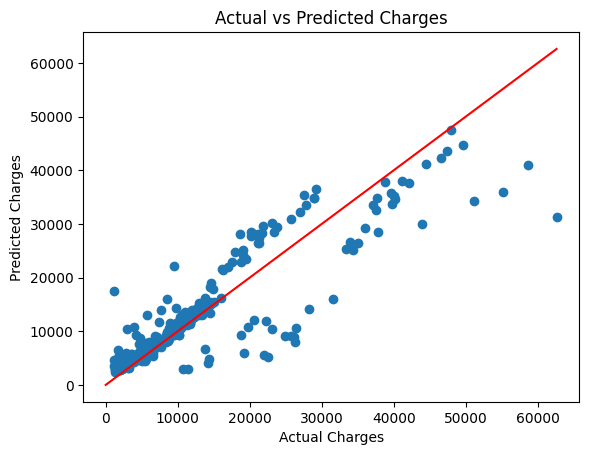

In [ ]:
#Actual vs Predicted plot
y_pred = model_opt.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.plot([0, max(y_test)], [0, max(y_test)], color = 'red')
plt.show()

**Observations:**

*   The plot shows a good correlation between actual and predicted charges, with points generally following the red line.
*   The model's predictions are more accurate for lower charges and show more scattering for higher charges, indicating less precision for high-cost cases.

# Project Summary and Conclusions

This project aimed to predict medical insurance charges using an Artificial Neural Network (ANN) based on individual characteristics.

**Key Findings from EDA:**

*   The distribution of charges is right-skewed, indicating a prevalence of lower charges with some individuals having significantly higher costs.
*   Smoking status has a major impact on charges, with smokers facing substantially higher costs.
*   Higher BMI and older age are associated with increased medical insurance charges.
*   The Southeast region exhibits the highest average charges.

**Model Performance:**

*   A baseline ANN model showed poor performance with a negative R2 score, indicating it was not a suitable model for the task.
*   An optimized ANN model incorporating Dropout layers and an Adam optimizer with a specific learning rate achieved a much better performance.
*   The optimized model resulted in an R2 score of approximately 0.83 on the training data and 0.78 on the test data. The close R2 scores between training and testing data suggest that the model is not significantly overfitting.
*   The actual vs. predicted charges plot for the optimized model shows a good overall correlation, although the predictions are less precise for higher charge values.

**Conclusion:**

The optimized ANN model demonstrates a reasonable ability to predict medical insurance charges based on the provided features. While the model performs well for lower to moderate charges, predicting high charges remains more challenging, which is a common characteristic in datasets with skewed target variables and outliers. Further improvements could potentially involve exploring different model architectures, hyperparameter tuning, or employing techniques to handle skewed data and outliers more effectively.